<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#FCF6F5;
            letter-spacing:0.5px;
            text-align: center">
<h1 style="padding: 10px;
           color:#FFA351;
           text-align:center;
           font-family: Cursive;
           font-size:200%;">
Volleyball Match Data Analysis
</h1>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
Welcome to this exploratory data analysis of volleyball match data. Before we dive into the analysis, let's briefly understand some fundamentals about volleyball, a team sport where two teams, each consisting of six players, are separated by a net. The teams try to score points by grounding the ball on the other team's court following the official rules.
</p>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
A match is played best 5 of 9 sets. The first team to reach 25 points wins a set. However, if a set reaches a 24-24 tie, it continues until one team gains a two-point advantage. The fifth tie-breaker set, if necessary, is played to 15 points, with the same two-point rule applied.
</p>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
In this analysis, we will leverage the rich datasets available on volleyball matches to extract meaningful insights and trends. This notebook will cover data visualization, and statistical analysis of various aspects of the matches, such as match distribution, team performance,and more.
</p>
</div>

# Data Preparation

<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#FCF6F5;
            letter-spacing:0.5px;
            text-align: center">
<h2 style="padding: 10px;
           color:#FFA351;
           text-align:center;
           font-family: Cursive;
           font-size:180%;">
Data Preparation and Initial Analysis
</h2>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
In the first step of our analysis, we load the required datasets, namely the matches and teams data. We perform data merging to associate the teams with their respective matches. 
</p>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
After preparing the data, we proceed to create a 'winner' column to identify the winning team for each match. With this new column, we can compute the number of wins by each team, leading us to determine the team with the most victories.
</p>
</div>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the matches dataset
matches = pd.read_csv('../input/world-volleyball-data-players-teams-and-more/matches.csv')

# Load the teams dataset
teams = pd.read_csv('../input/world-volleyball-data-players-teams-and-more/teams.csv')

# Merge matches and teams datasets
matches = matches.merge(teams, left_on='first_team_id', right_on='team_id', how='left')
matches = matches.rename(columns={'team_name': 'first_team_name'}).drop('team_id', axis=1)

matches = matches.merge(teams, left_on='second_team_id', right_on='team_id', how='left')
matches = matches.rename(columns={'team_name': 'second_team_name'}).drop('team_id', axis=1)

# Now, let's try to find the team with the most wins
# For this, we will first create a new column 'winner'
matches['winner'] = matches.apply(lambda row: row['first_team_name'] if row['n_set_team1'] > row['n_set_team2'] else row['second_team_name'], axis=1)

# Count the number of wins by each team
team_wins = matches['winner'].value_counts()

# Number of Matches per Year

<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#FCF6F5;
            letter-spacing:0.5px;
            text-align: center">
<h2 style="padding: 10px;
           color:#FFA351;
           text-align:center;
           font-family: Cursive;
           font-size:180%;">
Analysis of Number of Matches per Year
</h2>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
In this part of the analysis, we examine the distribution of matches over the years. By plotting the number of matches per year, we can observe trends and variations in the frequency of matches over time. 
</p>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
This time series analysis could provide insights into the evolution of the sport, the impact of external factors such as global events or changes in the sport's popularity.
</p>
</div>

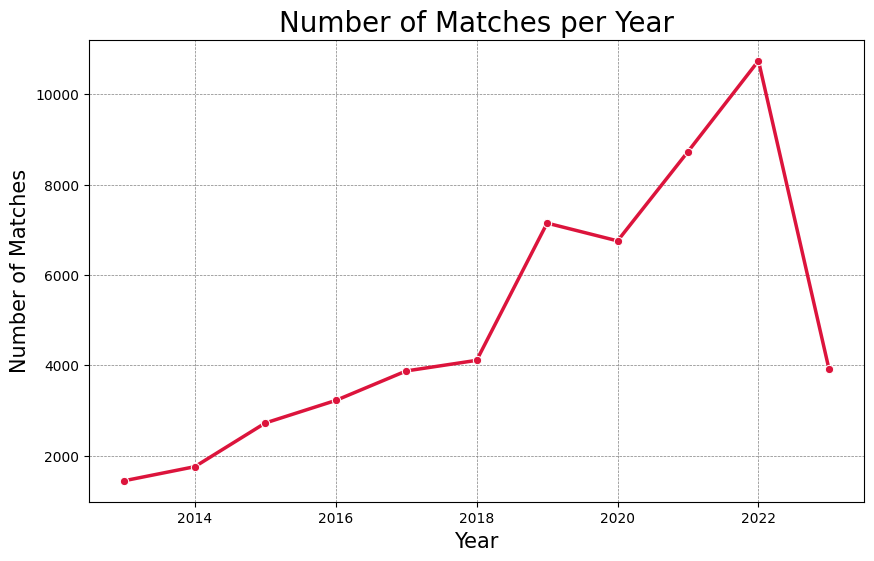

In [20]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Load libraries for date handling
from datetime import datetime

# Convert 'date' column to datetime
matches['date'] = pd.to_datetime(matches['date'])

# Extract year from 'date' and create a new column 'year'
matches['year'] = matches['date'].dt.year

# Count the number of matches per year
matches_per_year = matches['year'].value_counts().sort_index()

# Plot number of matches per year
plt.figure(figsize=(10,6))
sns.lineplot(x=matches_per_year.index, y=matches_per_year.values, marker='o', sort = False, color='crimson', linewidth=2.5)
plt.title('Number of Matches per Year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Matches', fontsize=15)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

# Top 10 Teams

<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#FCF6F5;
            letter-spacing:0.5px;
            text-align: center">
<h2 style="padding: 10px;
           color:#FFA351;
           text-align:center;
           font-family: Cursive;
           font-size:180%;">
Top 10 Teams with the Most Wins
</h2>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
In this part of the analysis, we identify and visualize the top 10 teams with the highest number of wins. These teams have demonstrated exceptional performance and consistency in winning their matches.
</p>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
The visualization uses a gradient color mapping, with teams having more wins displayed in warmer colors. This gives a quick and intuitive understanding of each team's relative performance.
</p>
</div>

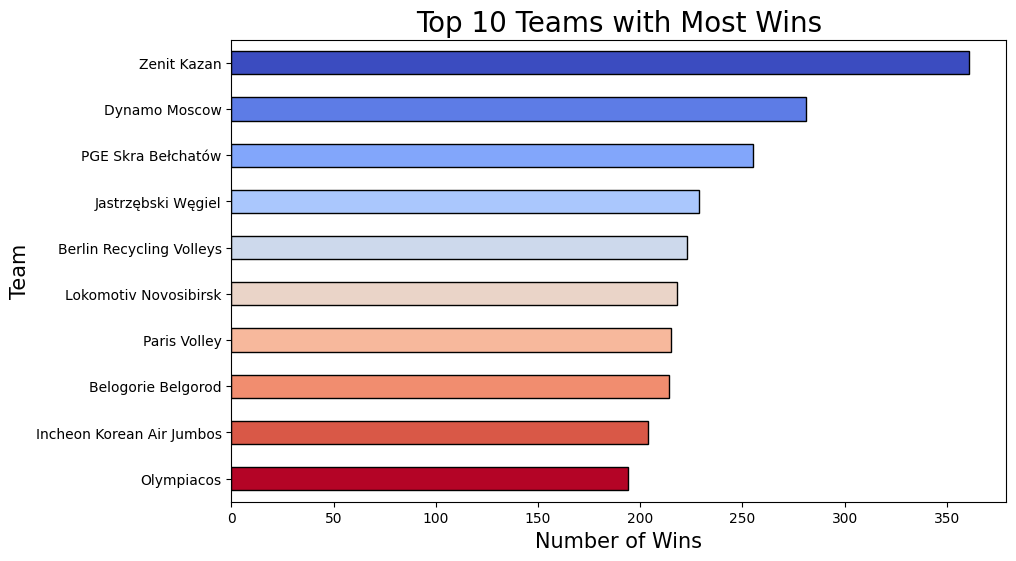

In [21]:
# Create a gradient color mapping based on number of wins
colors = plt.cm.coolwarm(np.linspace(0,1,len(team_wins[:10])))

# Plot the top 10 teams with the most wins
plt.figure(figsize=(10,6))
team_wins[:10].plot(kind='barh', color=colors, edgecolor='black')
plt.title('Top 10 Teams with Most Wins', fontsize=20)
plt.xlabel('Number of Wins', fontsize=15)
plt.ylabel('Team', fontsize=15)
plt.gca().invert_yaxis()  # invert y-axis to have the team with the most wins at the top
plt.show()



# Top 10 Leagues

<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#FCF6F5;
            letter-spacing:0.5px;
            text-align: center">
<h2 style="padding: 10px;
           color:#FFA351;
           text-align:center;
           font-family: Cursive;
           font-size:180%;">
Analyzing the Top 10 Leagues with the Most Matches
</h2>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
In this section, we count the number of matches played in each league and identify the top 10 leagues with the most matches. This information could provide insights into the most active leagues in terms of match frequency.
</p>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
We display this information using a horizontal bar plot, which clearly shows the ranking of the leagues based on the number of matches.
</p>
</div>

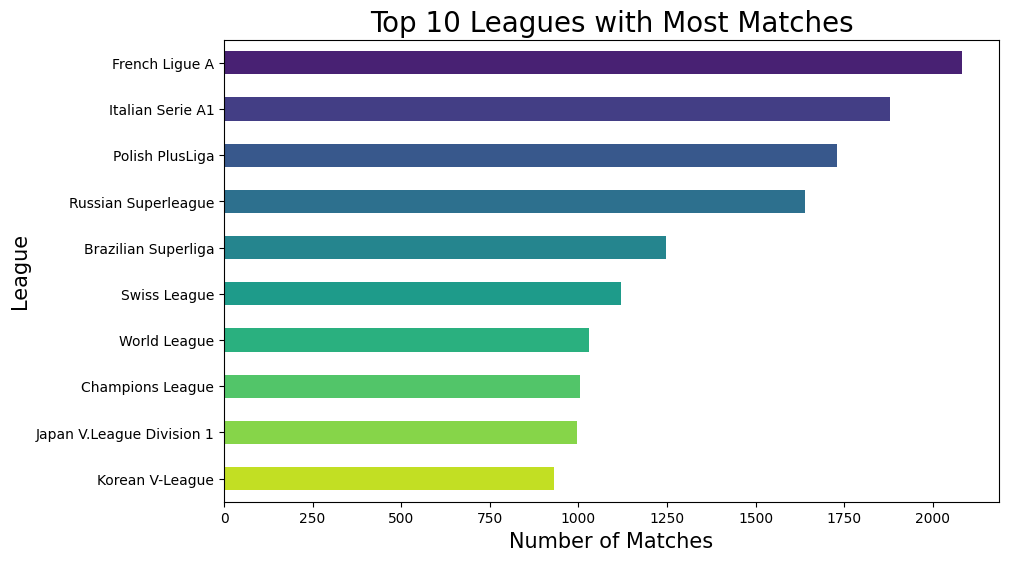

In [22]:
# Count the number of matches per league
matches_per_league = matches['league'].value_counts()

# Get the top 10 leagues with the most matches
top_leagues = matches_per_league.nlargest(10)

# Define the color palette
colors = sns.color_palette('viridis', len(top_leagues))

# Plot the number of matches for the top 10 leagues
plt.figure(figsize=(10,6))
top_leagues.plot(kind='barh', color=colors)
plt.title('Top 10 Leagues with Most Matches', fontsize=20)
plt.xlabel('Number of Matches', fontsize=15)
plt.ylabel('League', fontsize=15)
plt.gca().invert_yaxis()  # invert y-axis to have the league with the most matches at the top
plt.show()

# Matches Across the Week

<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#FCF6F5;
            letter-spacing:0.5px;
            text-align: center">
<h2 style="padding: 10px;
           color:#FFA351;
           text-align:center;
           font-family: Cursive;
           font-size:180%;">
Distribution of Matches Across the Week
</h2>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
In this section, we explore the distribution of volleyball matches across the days of the week. The aim of this analysis is to understand the scheduling of matches and identify the days when matches are most frequently played.
</p>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
We create a bar plot for this purpose, where each bar represents a day of the week, and the height of the bar represents the number of matches played on that day. This visualization enables us to quickly identify the most and least popular days for scheduling volleyball matches.
</p>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
Understanding the distribution of matches across the week could provide insights into the scheduling preferences of the league organizers, as well as potential patterns in viewer engagement. It could also be useful for teams in planning their training and rest schedules.
</p>
</div>

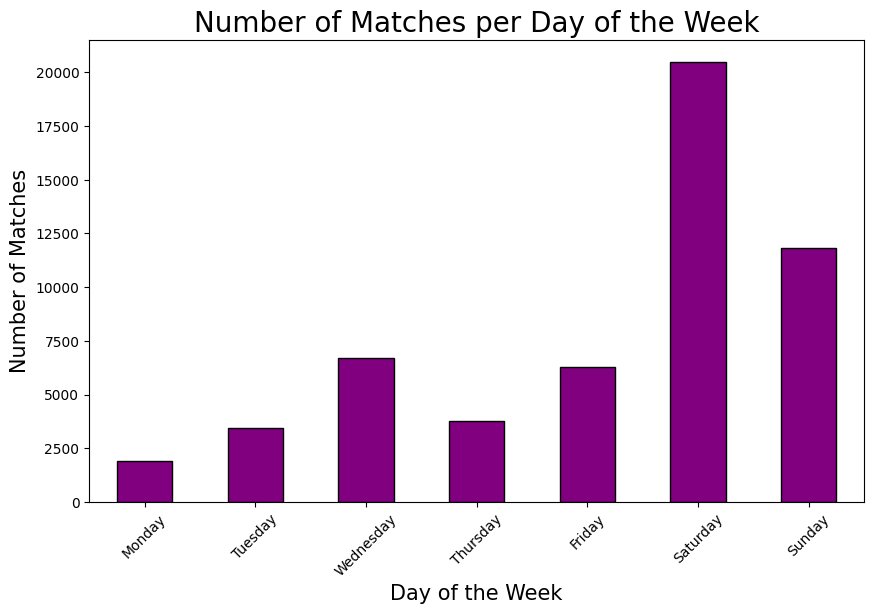

In [23]:
# Extract day of week from 'date' and create a new column 'day_of_week'
matches['day_of_week'] = matches['date'].dt.day_name()

# Order of days for plotting
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Count the number of matches per day of the week
matches_per_day = matches['day_of_week'].value_counts().loc[order]

# Plot the number of matches per day of the week
plt.figure(figsize=(10,6))
matches_per_day.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Number of Matches per Day of the Week', fontsize=20)
plt.xlabel('Day of the Week', fontsize=15)
plt.ylabel('Number of Matches', fontsize=15)
plt.xticks(rotation=45)
plt.show()

# Home and Away Scores

<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#FCF6F5;
            letter-spacing:0.5px;
            text-align: center">
<h2 style="padding: 10px;
           color:#FFA351;
           text-align:center;
           font-family: Cursive;
           font-size:180%;">
Examining the Distribution of Home and Away Scores
</h2>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
In this section, we focus on the distribution of scores for home and away teams in volleyball matches. The aim of this analysis is to understand the scoring patterns and see if there are notable differences between home and away team scores.
</p>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
We create two histograms for this purpose: one for home team scores ('n_set_team1') and one for away team scores ('n_set_team2'). By placing these histograms side by side, we can easily compare the distributions and potentially draw insights on whether being the home team has an impact on the scoring in volleyball matches.
</p>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
Each histogram provides a visual representation of the frequency of different scores. The x-axis represents the scores, and the y-axis represents the count of matches with that score. Observing the shape and spread of these distributions could give us insights into common scorelines, the competitiveness of matches, and more.
</p>
</div>

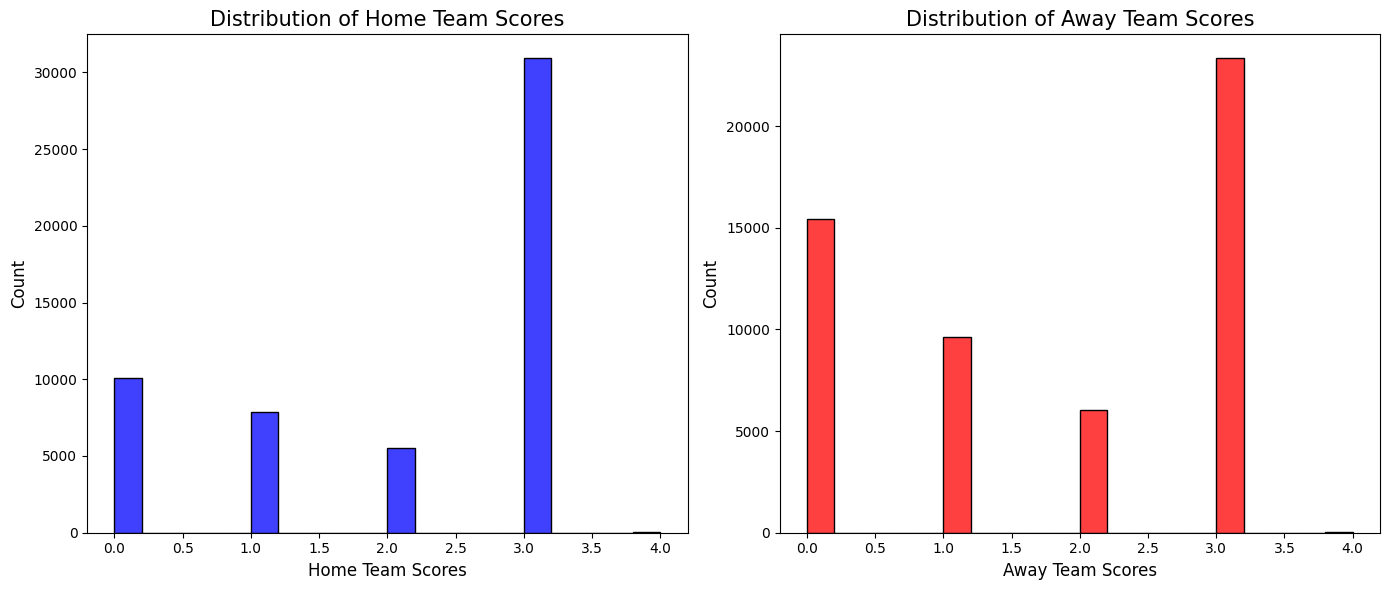

In [24]:
# Plot the distribution of home and away scores
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(matches['n_set_team1'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Home Team Scores', fontsize=15)
plt.xlabel('Home Team Scores', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot(1,2,2)
sns.histplot(matches['n_set_team2'], bins=20, color='red', edgecolor='black')
plt.title('Distribution of Away Team Scores', fontsize=15)
plt.xlabel('Away Team Scores', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

# Distribution of Matches Across Months

<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#FCF6F5;
            letter-spacing:0.5px;
            text-align: center">
<h2 style="padding: 10px;
           color:#FFA351;
           text-align:center;
           font-family: Cursive;
           font-size:180%;">
Exploring the Distribution of Matches Across Months
</h2>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
In this part of our analysis, we dive into the temporal distribution of volleyball matches, specifically focusing on the distribution across different months of the year. This can provide us with insights into whether there's a peak period for matches, possibly corresponding to certain seasons or competitions.
</p>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
We start by extracting the month from the 'date' column of our dataset. Next, we count the number of matches per month, sorting the counts by month number.
</p>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
We then create a bar plot to visualize the number of matches per month. The x-axis represents the month, and the y-axis represents the number of matches. This visualization allows us to understand if there are any trends or patterns in the scheduling of volleyball matches throughout the year.
</p>
</div>

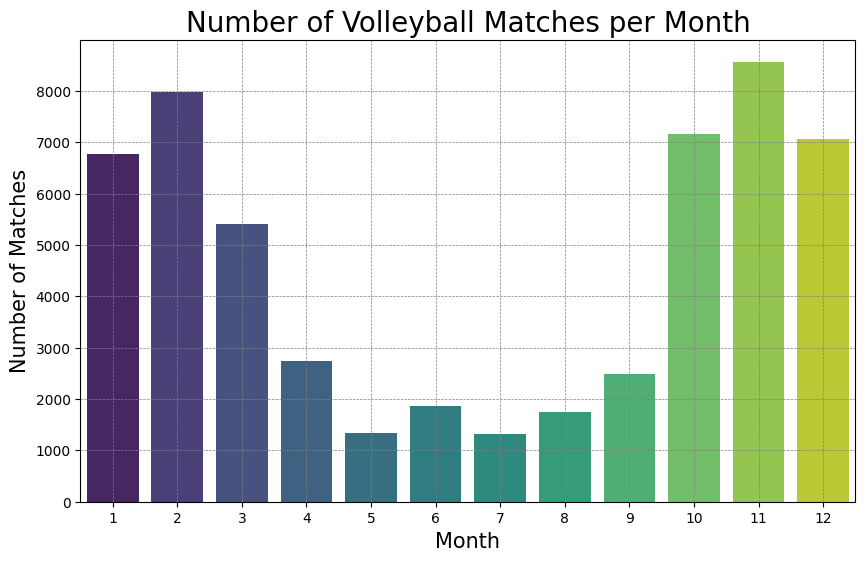

In [31]:
# 1. Analyze the distribution of matches across different months or seasons to see if there's a peak period for matches.
matches['month'] = matches['date'].dt.month
matches_per_month = matches['month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=matches_per_month.index, y=matches_per_month.values, palette='viridis')
plt.title('Number of Volleyball Matches per Month', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Matches', fontsize=15)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

# Set Differences in Matches

<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#FCF6F5;
            letter-spacing:0.5px;
            text-align: center">
<h2 style="padding: 10px;
           color:#FFA351;
           text-align:center;
           font-family: Cursive;
           font-size:180%;">
Analyzing Winning Set Differences in Matches
</h2>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
In this part of the notebook, we focus on analyzing the differences in the number of sets won by the winning and losing teams in each match. This can provide us with insights into the competitiveness of the matches.
</p>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
We start by creating a new column in our dataset called 'set_difference', which is the absolute difference between the number of sets won by the first team and the second team. Next, we count the frequency of each set difference in the dataset.
</p>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
Finally, we create a bar plot to visualize the frequency of each set difference. The x-axis represents the set difference, and the y-axis represents the number of matches with that set difference. This visualization allows us to understand the distribution of set differences and, in turn, the competitiveness of the matches.
</p>
</div>

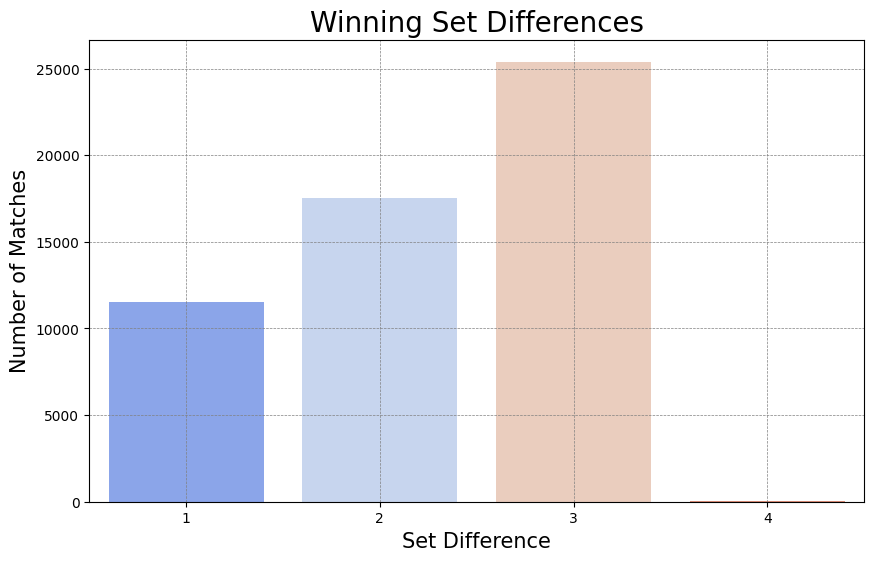

In [26]:
matches['set_difference'] = abs(matches['n_set_team1'] - matches['n_set_team2'])
set_diff_counts = matches['set_difference'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=set_diff_counts.index, y=set_diff_counts.values, palette='coolwarm')
plt.title('Winning Set Differences', fontsize=20)
plt.xlabel('Set Difference', fontsize=15)
plt.ylabel('Number of Matches', fontsize=15)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

# Performance Analysis of Top 3 Teams

<div style="border-radius:10px;
            border : #101820 solid;
            background-color:#FCF6F5;
            letter-spacing:0.5px;
            text-align: center">
<h2 style="padding: 10px;
           color:#FFA351;
           text-align:center;
           font-family: Cursive;
           font-size:180%;">
Performance Analysis of Top 3 Teams Over the Years
</h2>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
In this section of the notebook, we analyze the performance of the top three teams in our dataset over the years. We begin by selecting the top three teams based on their total number of wins. Then, we filter our dataset to include only the matches involving these top teams.
</p>
<p style="padding: 10px;
           color:#2BAE66;
           text-align:center;
           line-height:1.5;
           font-family: Cursive;
           font-size:140%;">
Next, we create a new dataframe that shows the number of wins per year for each of these teams. Finally, we visualize this data using a line plot, which shows the number of wins on the y-axis and the year on the x-axis. This plot provides a clear picture of each team's performance trend over the years.
</p>
</div>

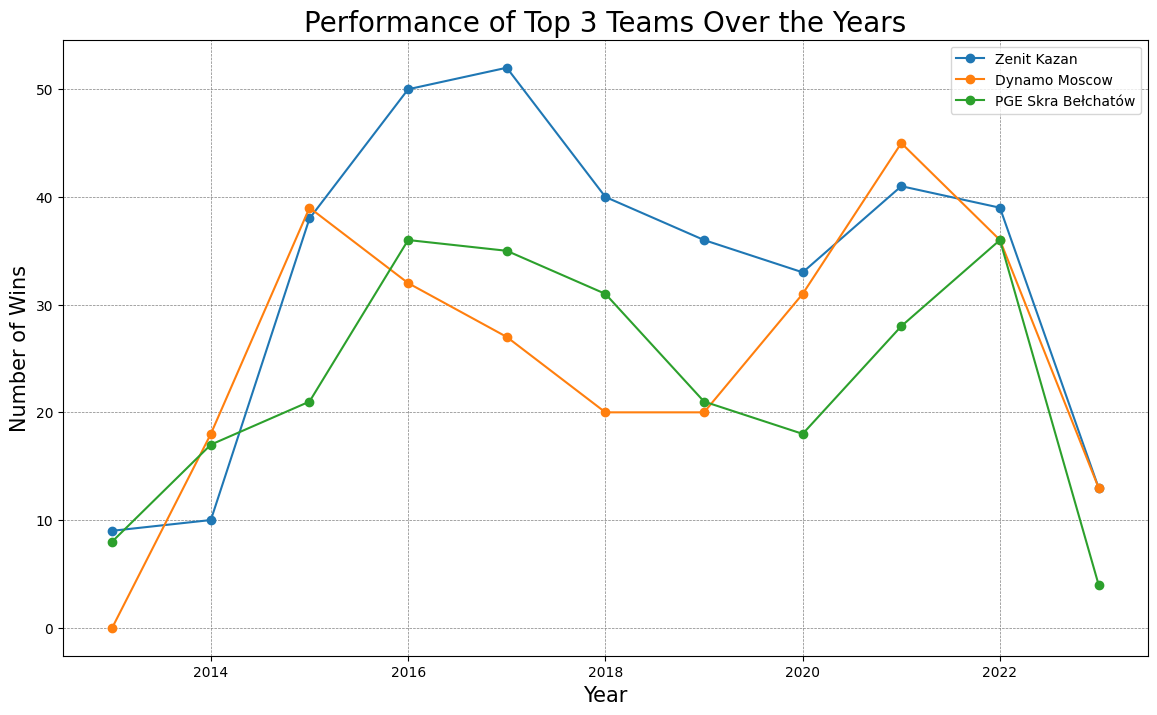

In [30]:
# Select top three teams
top_teams = team_wins.index[:3]

# Filter matches involving the top three teams
top_teams_matches = matches[matches['first_team_name'].isin(top_teams) | matches['second_team_name'].isin(top_teams)]

# Create a year-team dataframe showing the number of wins per year
wins_per_year_per_team = top_teams_matches.groupby(['year', 'winner']).size().unstack(fill_value=0)

# Plot the performance of top three teams over the years
plt.figure(figsize=(14, 8))

for team in top_teams:
    plt.plot(wins_per_year_per_team.index, wins_per_year_per_team[team], marker='o', label=team)

plt.title('Performance of Top 3 Teams Over the Years', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Wins', fontsize=15)
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()